In [1]:
from obliquetree import Classifier
from obliquetree.utils import visualize_tree

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

RANDOM_STATE = 42

In [2]:
X, y = fetch_openml("adult", version=2, return_X_y=True)

y = (y == ">50K").astype(int)

cat_column = X.select_dtypes(exclude="number").columns
numeric_columns = X.select_dtypes(include="number").columns

encoder = LabelEncoder()
for col in cat_column:
    X[col] = X[col].astype(str)
    X[col] = encoder.fit_transform(X.loc[:, col]).astype(float)


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)


scaler = StandardScaler()

X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

cat_idx = [X_train.columns.get_loc(col) for col in cat_column]

In [3]:
clf = Classifier(
    use_oblique=True,
    max_depth=2,
    n_pair=2,
    random_state=RANDOM_STATE,
    categories=cat_idx,
)

clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
train_mse = accuracy_score(y_train, train_pred)

test_pred = clf.predict(X_test)
test_mse = accuracy_score(y_test, test_pred)

print(train_mse, test_mse)

0.8395075209521989 0.8513635246908525


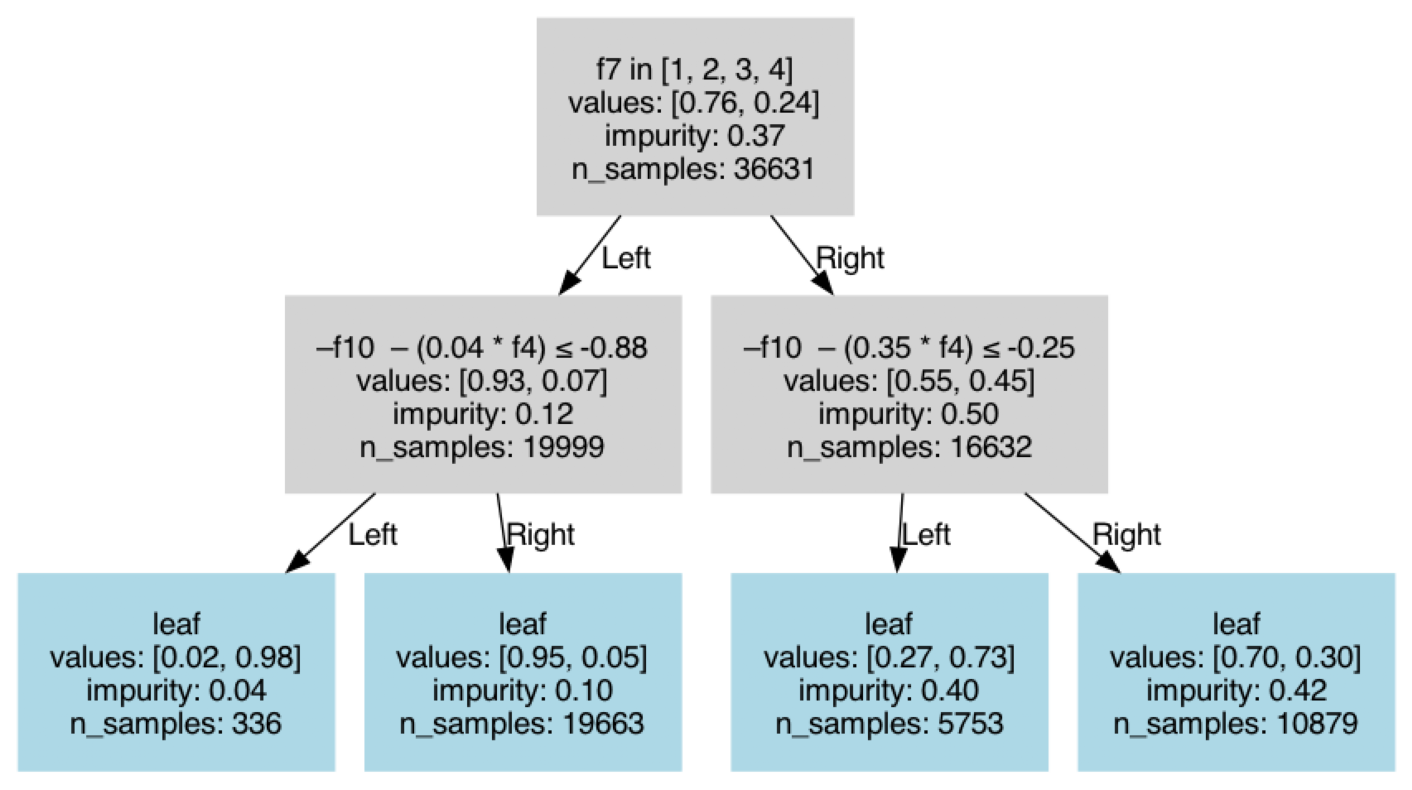

In [4]:
visualize_tree(clf,)

In [5]:
clf = Classifier(
    use_oblique=False,
    max_depth=2,
    categories=cat_idx,
)

clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
train_mse = accuracy_score(y_train, train_pred)

test_pred = clf.predict(X_test)
test_mse = accuracy_score(y_test, test_pred)

print(train_mse, test_mse)

0.826704157680653 0.8381786913438702


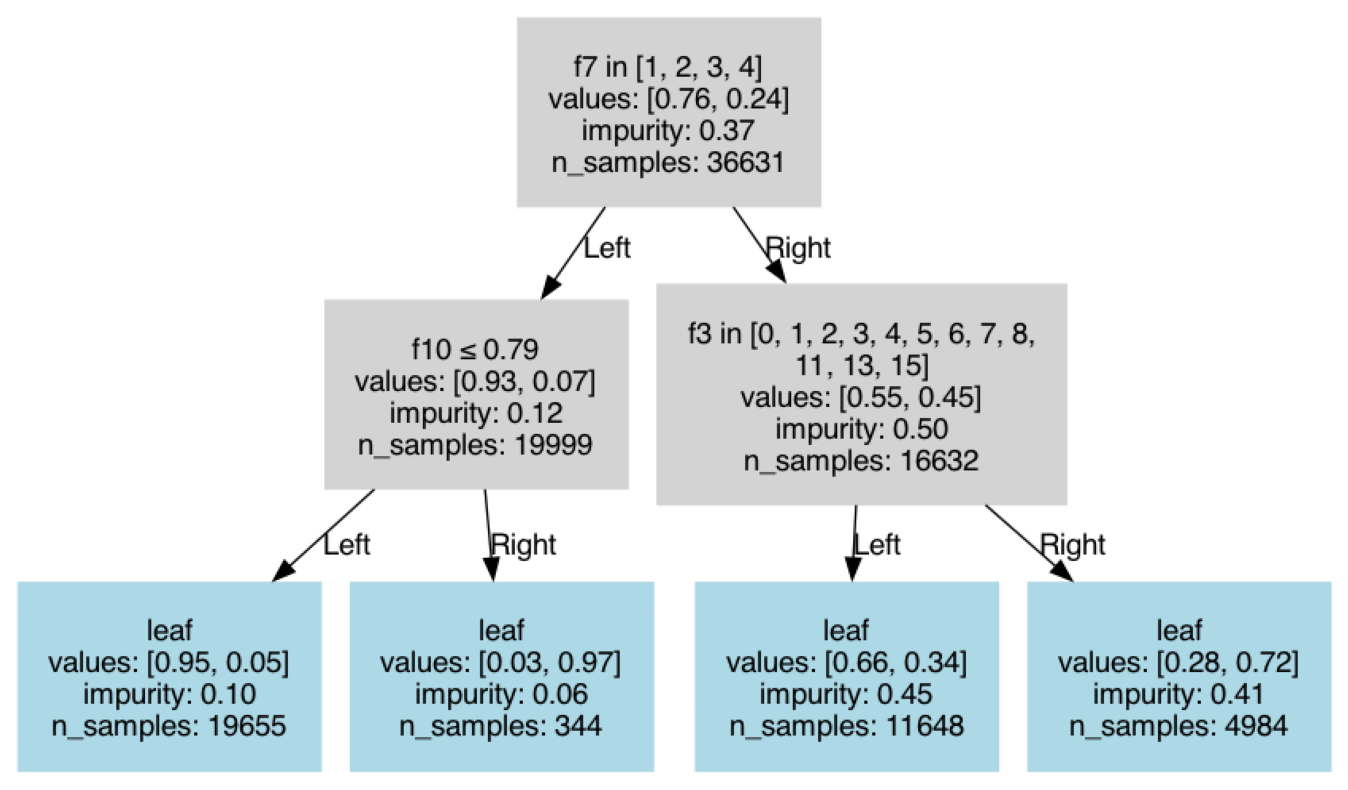

In [6]:
visualize_tree(clf)

In [7]:
clf = Classifier(
    use_oblique=False,
    max_depth=2,
)

clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
train_mse = accuracy_score(y_train, train_pred)

test_pred = clf.predict(X_test)
test_mse = accuracy_score(y_test, test_pred)

print(train_mse, test_mse)

0.8238923316316781 0.8340021292277455


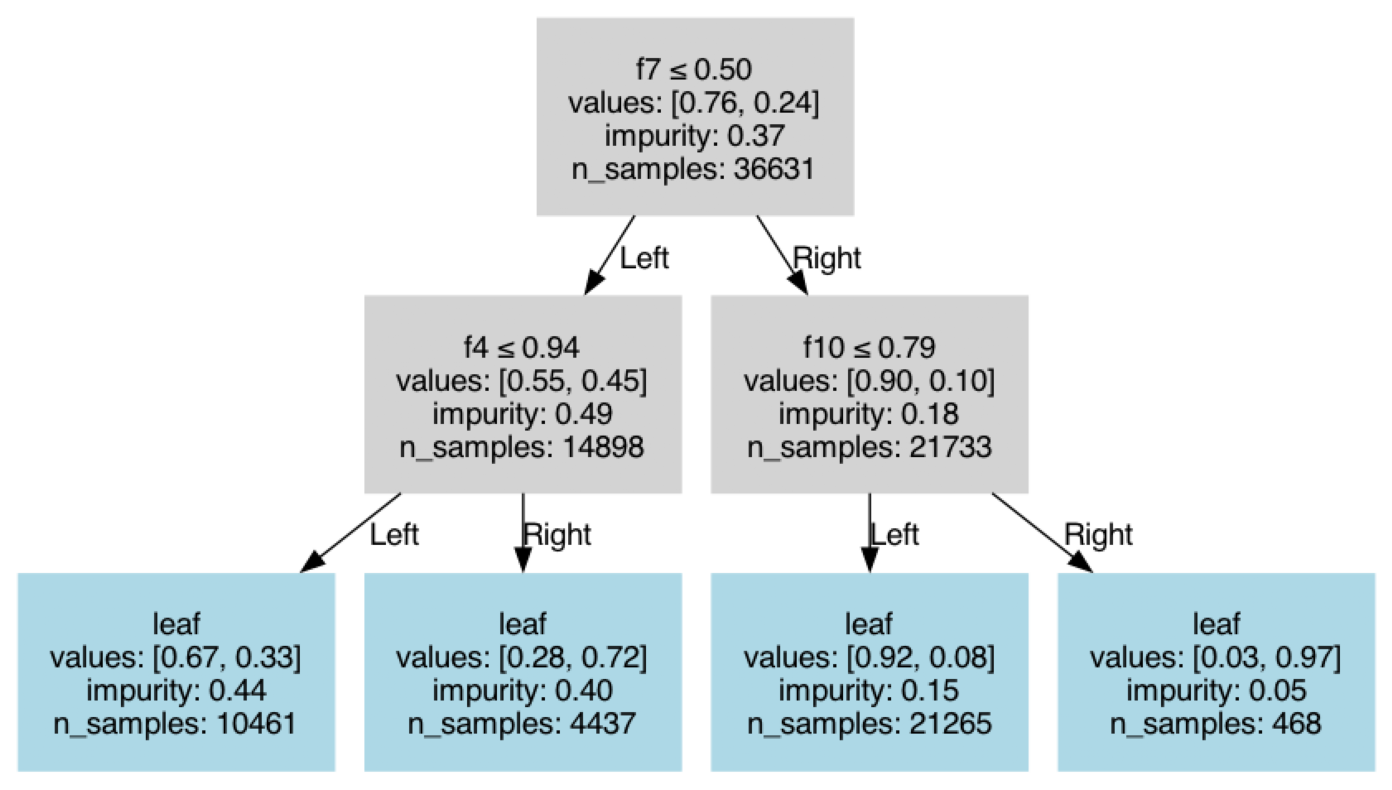

In [8]:
visualize_tree(clf)

In [9]:
clf = Classifier(
    use_oblique=True,
    max_depth=2,
    random_state=RANDOM_STATE,
    n_pair=X.shape[1],
    categories=cat_idx,
)

clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
train_mse = accuracy_score(y_train, train_pred)

test_pred = clf.predict(X_test)
test_mse = accuracy_score(y_test, test_pred)

print(train_mse, test_mse)

0.84021730228495 0.8489886168208992


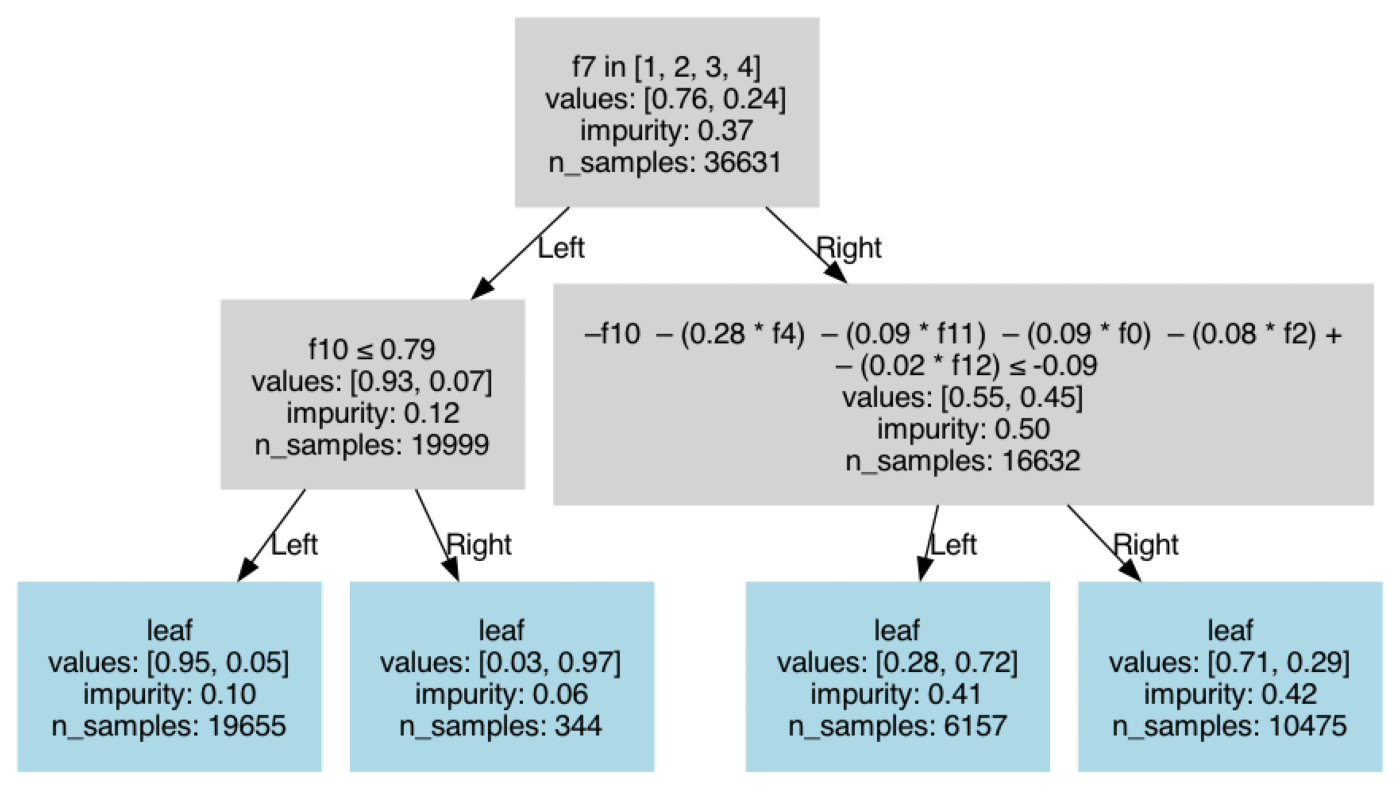

In [10]:
visualize_tree(clf)